# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## Imports

In [243]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)
import phik
from phik import resources, report

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [244]:
pwd

'C:\\Users\\Iweimer\\Desktop\\BB_Git\\1083-albumin-data-exploration\\ML\\K70_Cohort'

In [245]:
df_alb = pd.read_csv('K70_cohort.csv', index_col=0)

In [246]:
df_alb.head()

personid                           encounterid  \
0  005c5ecc-af08-439c-9649-ddfa92c01419  48796da9-9f8e-4eb2-8052-4cf684f2777d   
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   

            index_date  zip_code bed_size  ICU   LOS_days  90_day_mortality  \
0  2021-01-15 18:44:00         0   >=1000    1  30.388194                 0   
1  2021-09-18 14:29:00         7  500-999    0   8.240278                 0   
2  2016-11-30 04:54:00         9  300-499    1   5.698611                 0   
3  2016-02-27 00:53:00         1   >=1000    0  13.857639                 0   
4  2019-08-23 21:07:00         1   >=1000    0   5.127778                 0   

   90_day_readmission  days_until_readmission  hospital_free_days  Cirrhosis  \
0                 0.0              324.164259                  28          1   
1                 1.0               32.963889                  81          1   
2                 0.0                     NaN                  85          1   
3                 0.0                     NaN                  77          1   
4                 0.0              277.255556                  27          1   

   CCI  qSOFA    MELD  albumin_timing  SEWS  tenant  
0    2      1     NaN               2     4      73  
1    4      1  11.000               0     0      36  
2    4      0  18.518               0     0      18  
3    2      1  22.000               2     2      46  
4    3      0  16.574               1     0      45

In [247]:
df_alb.shape

(20844, 18)

In [248]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 20844
Number of unique encounters: 20844


In [249]:
df_alb.isnull().sum()

personid                      0
encounterid                   0
index_date                    0
zip_code                      0
bed_size                      0
ICU                           0
LOS_days                      0
90_day_mortality              0
90_day_readmission         5086
days_until_readmission    11656
hospital_free_days            0
Cirrhosis                     0
CCI                           0
qSOFA                         0
MELD                       7452
albumin_timing                0
SEWS                          0
tenant                        0
dtype: int64

## Load Non Albumin Data

In [250]:
df_no_alb = pd.read_csv('K70_control_cohort.csv', index_col=0)

In [251]:
df_no_alb.head()

personid                           encounterid  \
0  0028a16c-3095-4bcd-aa4c-25913a5212f7  a5d28d15-e02a-4221-8fc3-4b3d1b3aa7fb   
1  00628e4e-04bb-4a8e-a71e-a052e6ceb93c  c0962fcb-bddd-4245-afe2-f768a0c398f5   
2  031fb371-82de-439c-af7f-6453ae581a7b  e2b5ecff-3d23-4bef-9ac3-4487fe2c932e   
3  03b6658c-74b9-4955-afa4-a110fef53e31  7727d081-52ae-40b6-a0d6-fe1111fcdcbe   
4  03d4643b-2d0e-4019-9d4c-e964d52893d8  5148fe42-a45b-4570-9b4c-346ad4eaa881   

            index_date  zip_code bed_size  ICU  LOS_days  90_day_mortality  \
0  2022-02-25 22:18:41         9   >=1000    1  1.941887                 1   
1  2019-05-12 09:08:00         8   >=1000    0  2.062500                 1   
2  2018-06-27 18:19:00         8   >=1000    0  7.161111                 0   
3  2021-03-14 00:42:00         6  500-999    0  2.894444                 0   
4  2017-05-03 03:27:00         2  500-999    0  2.519444                 0   

   90_day_readmission  days_until_readmission  hospital_free_days  Cirrhosis  \
0                 NaN                     NaN                   0          1   
1                 NaN                     NaN                   0          1   
2                 1.0                8.899306                   2          1   
3                 1.0               75.006944                   7          0   
4                 0.0              705.913194                  88          0   

   CCI  qSOFA    MELD  SEWS  tenant  
0    4      0  39.099     0      68  
1    3      2  31.000     2      63  
2    5      1  12.000     1      63  
3    3      1   7.000     0      77  
4    1      0   6.000     2     111

In [252]:
df_no_alb.shape

(114605, 17)

In [253]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 114605
Number of unique encounters: 114605


In [254]:
df_no_alb.isnull().sum()

personid                      0
encounterid                   0
index_date                    0
zip_code                      0
bed_size                    119
ICU                           0
LOS_days                      0
90_day_mortality              0
90_day_readmission         4664
days_until_readmission    45607
hospital_free_days            0
Cirrhosis                     0
CCI                           0
qSOFA                         0
MELD                      60492
SEWS                          0
tenant                        0
dtype: int64

## Examine Difference In Vars

In [255]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'index_date',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_days',
 '90_day_mortality',
 '90_day_readmission',
 'days_until_readmission',
 'hospital_free_days',
 'Cirrhosis',
 'CCI',
 'qSOFA',
 'MELD',
 'albumin_timing',
 'SEWS',
 'tenant']

In [256]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'index_date',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_days',
 '90_day_mortality',
 '90_day_readmission',
 'days_until_readmission',
 'hospital_free_days',
 'Cirrhosis',
 'CCI',
 'qSOFA',
 'MELD',
 'SEWS',
 'tenant']

In [257]:
lst3 = [x for x in lst1 if x not in lst2]

In [258]:
lst3

['albumin_timing']

## Remove variables not relevant to analysis 

In [259]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['index_date'], inplace=True)

df_no_alb.drop(columns = ['index_date'], inplace=True)

In [260]:
df_alb['90_day_mortality'].value_counts()

0    15758
1     5086
Name: 90_day_mortality, dtype: int64

In [261]:
df_no_alb['90_day_mortality'].value_counts()

0    109941
1      4664
Name: 90_day_mortality, dtype: int64

## Create binary "Albumin" variable for both datasets

In [262]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [263]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

In [264]:
# df_alb.shape

In [265]:
# df_no_alb.shape

In [266]:
# df_alb.head()

In [267]:
# df_no_alb.head()

## Combine Datasets

In [268]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [269]:
df.shape

(135449, 18)

In [270]:
df.head(50)

personid  \
0   005c5ecc-af08-439c-9649-ddfa92c01419   
1   07116bfe-694e-4d32-b989-18d01be1c63a   
2   0966a95d-6f14-4791-98eb-192a57c6cf9d   
3   0b195e78-8b4c-4885-a6f1-162738405bf4   
4   0c08fc94-32eb-4e48-bd22-f075f911f7cb   
5   0d35b91a-883d-43cb-ad15-31123a3008c8   
6   1240636c-0665-457e-a973-11e6f31e73a7   
7   14a7cf74-4469-4102-aac3-cdf906baa891   
8   16e21cc6-4d8c-44b1-b5e6-206c5f466893   
9   17366a16-6826-417e-aaec-cdbb22ce6f85   
10  198035a7-a39a-4c51-8f9c-22b7968cc1e4   
11  19993717-aa8e-4f29-b59c-7471d8f2e80f   
12  1fa14120-434b-4db8-a05a-d05686918255   
13  22c621aa-9586-4833-b301-7baa337b801e   
14  24ccefd2-5f30-4bb2-91ee-30e9ae0e17ac   
15  26933aaf-41e2-4669-a36d-bc4dc8435aab   
16  274bdb85-f0de-4a44-9934-a5bc229b36a6   
17  28d8c207-5688-48d3-ae5a-0d0b229b2f5e   
18  29ff06b4-7528-4af5-a726-94481e2205b2   
19  2b9f09a6-05c7-4624-b445-115d9e5dc82b   
20  2cfbf2b2-15de-4343-8518-67852919a555   
21  2d3f6a7a-67e5-433e-be9f-dfffa2f20e5a   
22  2d575e51-84af-4dca-a83d-e87548548158   
23  37025f9f-029b-43f5-9709-f24901f447cd   
24  37a5ff4e-69e3-429a-8b22-f0cfac011c87   
25  37b7f928-1eaf-4c76-982c-c517caeda05a   
26  3a0a96e8-ffac-43b1-aa5a-0f9cd2f947d7   
27  3a0b39be-3ba5-4990-a373-61aeebab868e   
28  3a609ef4-33b9-4212-aee7-c4f616bf5e3b   
29  3beb6fd0-d944-4ad4-9ccf-d372e62635e1   
30  3f73b7d7-3ec0-4c65-94f0-7b3bcb423266   
31  409c6fe3-5849-404e-b968-5e7d1d8e9d4e   
32  42d6a9d8-29da-4b4d-bc1c-422707be190c   
33  43eb4e11-ae4e-4c8f-a7ec-a026ebeba2c3   
34  475d11b8-558c-4e3f-b1a0-818d0ae16e1a   
35  4b39c792-416b-448a-9229-b83cd5ca304d   
36  4e118c67-5e40-4f7b-9e47-9f53546962a6   
37  5096d58b-853c-4d3f-b15d-a6ffe1bf7f9f   
38  51c3e17f-ecb1-403c-aa63-60f99cfa99d8   
39  52d67823-d49e-4121-8ab4-f320053bca31   
40  530a4ebd-d3ea-44f2-99ef-463c821aa707   
41  54f2e078-2ee6-4b02-8d29-c3b43e9a398d   
42  56ca0997-f86f-409b-ad83-38dc93c6a2c0   
43  57c9844e-85c5-4f52-9bd1-a3e9fe617e7a   
44  5927e138-c5c4-4dbc-81b2-86739cd8d2ce   
45  5973208e-1d90-44f6-b394-c11d56127484   
46  59b84b4b-5976-42ee-bae8-80ed628df991   
47  5aa222e2-81b6-4905-ba4e-68a05a939379   
48  5b1509d5-a94b-4a4b-b2c0-eef1ec1a690a   
49  5b8a40ff-94c0-4dea-bd39-5e35b5c70de3   

                             encounterid  zip_code bed_size  ICU    LOS_days  \
0   48796da9-9f8e-4eb2-8052-4cf684f2777d         0   >=1000    1   30.388194   
1   a3c69685-4dab-4db4-9f59-bc9e1e7b4714         7  500-999    0    8.240278   
2   2ff8ac65-0f37-42c0-a397-0b5c830900ee         9  300-499    1    5.698611   
3   07ea020e-dbef-418c-b4b2-be3d104ba6be         1   >=1000    0   13.857639   
4   03255b92-d10f-41fd-8387-9e223f9be912         1   >=1000    0    5.127778   
5   1dc64909-cbe3-46e2-94ae-7c6de6a38364         7  500-999    0   12.054167   
6   b24e6245-5f64-4f81-8292-30eafc3c1716         9   >=1000    0   14.795139   
7   47905ac2-9758-4da5-adc5-1349c4c232a9         9   >=1000    0    0.278912   
8   f0f847d0-a8c0-4d11-b500-110f6f495f1b         1   >=1000    0    0.307639   
9   68610783-67e4-414a-a969-18f82d7ae58a         1   >=1000    0    2.900000   
10  4e03c966-fb83-42e0-b940-bc40a1fcd351         8   >=1000    0   20.163889   
11  e4019d50-71c0-4c99-8186-834823fe5c23         8   >=1000    0    7.438889   
12  8da03794-c5a4-4f88-9a0b-08512bdd6059         6  500-999    0    3.861898   
13  92b9577e-6cd9-47cd-9893-5b488cb1f949         8  300-499    1   39.375694   
14  84600109-1891-4031-a589-f39cf7c508cf         9   >=1000    0    2.554167   
15  b27ecc3c-035b-44d6-9ab9-e6fc53d6961c         7   >=1000    1   14.080417   
16  dc1d2aae-e1d2-4e73-836a-01ba89c60d62         1  500-999    0   13.742361   
17  80016de4-b0c9-412d-8fb3-2289ec965020         1   >=1000    0    3.803472   
18  9da341fa-90e8-4d1c-87fd-3937e40a323a         9   >=1000    0   12.900336   
19  6b9f9896-88a8-42fd-8ae8-702905682ca3         1   >=1000    0   14.207639   
20  e7435f39-444d-4fcb-b4b2-9f2028eee857         8   >=1000    0    7.598611   
21  77e700dc-549c-4532-bb00

In [271]:
df.columns

Index(['personid', 'encounterid', 'zip_code', 'bed_size', 'ICU', 'LOS_days',
       '90_day_mortality', '90_day_readmission', 'days_until_readmission',
       'hospital_free_days', 'Cirrhosis', 'CCI', 'qSOFA', 'MELD',
       'albumin_timing', 'SEWS', 'tenant', 'albumin'],
      dtype='object')

## Create New 24h Variable

In [272]:
def alb_24(row):
    score = 0
    if row['albumin'] == 1 and row['albumin_timing'] in (1,2):
        score += 1
    return score

df['albumin_24hrs'] = df.apply(lambda row: alb_24(row), axis=1)

In [273]:
df.head()

personid                           encounterid  \
0  005c5ecc-af08-439c-9649-ddfa92c01419  48796da9-9f8e-4eb2-8052-4cf684f2777d   
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   

   zip_code bed_size  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0         0   >=1000    1  30.388194                 0                 0.0   
1         7  500-999    0   8.240278                 0                 1.0   
2         9  300-499    1   5.698611                 0                 0.0   
3         1   >=1000    0  13.857639                 0                 0.0   
4         1   >=1000    0   5.127778                 0                 0.0   

   days_until_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  \
0              324.164259                  28          1    2      1     NaN   
1               32.963889                  81          1    4      1  11.000   
2                     NaN                  85          1    4      0  18.518   
3                     NaN                  77          1    2      1  22.000   
4              277.255556                  27          1    3      0  16.574   

   albumin_timing  SEWS  tenant  albumin  albumin_24hrs  
0             2.0     4      73        1              1  
1             0.0     0      36        1              0  
2             0.0     0      18        1              0  
3             2.0     2      46        1              1  
4             1.0     0      45        1              1

## Look at variables, null values

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135449 entries, 0 to 114604
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   personid                135449 non-null  object 
 1   encounterid             135449 non-null  object 
 2   zip_code                135449 non-null  int64  
 3   bed_size                135330 non-null  object 
 4   ICU                     135449 non-null  int64  
 5   LOS_days                135449 non-null  float64
 6   90_day_mortality        135449 non-null  int64  
 7   90_day_readmission      125699 non-null  float64
 8   days_until_readmission  78186 non-null   float64
 9   hospital_free_days      135449 non-null  int64  
 10  Cirrhosis               135449 non-null  int64  
 11  CCI                     135449 non-null  int64  
 12  qSOFA                   135449 non-null  int64  
 13  MELD                    67505 non-null   float64
 14  albumin_timing      

In [275]:
df.isnull().sum()

personid                       0
encounterid                    0
zip_code                       0
bed_size                     119
ICU                            0
LOS_days                       0
90_day_mortality               0
90_day_readmission          9750
days_until_readmission     57263
hospital_free_days             0
Cirrhosis                      0
CCI                            0
qSOFA                          0
MELD                       67944
albumin_timing            114605
SEWS                           0
tenant                         0
albumin                        0
albumin_24hrs                  0
dtype: int64

In [276]:
df.albumin_timing.value_counts()

0.0    9607
1.0    7588
2.0    3649
Name: albumin_timing, dtype: int64

In [277]:
# fill in na albumin_timing as 0 for non-albumin patients

df['albumin_timing'] = df['albumin_timing'].fillna(0)

In [278]:
df.isnull().sum()

personid                      0
encounterid                   0
zip_code                      0
bed_size                    119
ICU                           0
LOS_days                      0
90_day_mortality              0
90_day_readmission         9750
days_until_readmission    57263
hospital_free_days            0
Cirrhosis                     0
CCI                           0
qSOFA                         0
MELD                      67944
albumin_timing                0
SEWS                          0
tenant                        0
albumin                       0
albumin_24hrs                 0
dtype: int64

In [279]:
# fill in na 90 day readmission as 0 for non-albumin patients

df['90_day_readmission'] = df['90_day_readmission'].fillna(0)

## Fill or Drop Rows with Null Values, Other

In [280]:
# drop variables 

df.drop(columns=['zip_code', 'bed_size', 'tenant'], inplace=True)

In [281]:
df.head()

personid                           encounterid  \
0  005c5ecc-af08-439c-9649-ddfa92c01419  48796da9-9f8e-4eb2-8052-4cf684f2777d   
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   

   ICU   LOS_days  90_day_mortality  90_day_readmission  \
0    1  30.388194                 0                 0.0   
1    0   8.240278                 0                 1.0   
2    1   5.698611                 0                 0.0   
3    0  13.857639                 0                 0.0   
4    0   5.127778                 0                 0.0   

   days_until_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  \
0              324.164259                  28          1    2      1     NaN   
1               32.963889                  81          1    4      1  11.000   
2                     NaN                  85          1    4      0  18.518   
3                     NaN                  77          1    2      1  22.000   
4              277.255556                  27          1    3      0  16.574   

   albumin_timing  SEWS  albumin  albumin_24hrs  
0             2.0     4        1              1  
1             0.0     0        1              0  
2             0.0     0        1              0  
3             2.0     2        1              1  
4             1.0     0        1              1

In [282]:
df.shape

(135449, 16)

In [283]:
# drop days_until_readmission because of missing values

df.drop(columns=['days_until_readmission'], inplace=True)

In [284]:
df.isnull().sum()

personid                  0
encounterid               0
ICU                       0
LOS_days                  0
90_day_mortality          0
90_day_readmission        0
hospital_free_days        0
Cirrhosis                 0
CCI                       0
qSOFA                     0
MELD                  67944
albumin_timing            0
SEWS                      0
albumin                   0
albumin_24hrs             0
dtype: int64

In [286]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [287]:
df.shape

(67505, 15)

In [288]:
df.isnull().sum()

personid              0
encounterid           0
ICU                   0
LOS_days              0
90_day_mortality      0
90_day_readmission    0
hospital_free_days    0
Cirrhosis             0
CCI                   0
qSOFA                 0
MELD                  0
albumin_timing        0
SEWS                  0
albumin               0
albumin_24hrs         0
dtype: int64

In [289]:
df.albumin_24hrs.value_counts()

0    60810
1     6695
Name: albumin_24hrs, dtype: int64

In [290]:
df.albumin_timing.value_counts()

0.0    60810
1.0     4317
2.0     2378
Name: albumin_timing, dtype: int64

In [291]:
df.shape

(67505, 15)

In [292]:
df.head()

personid                           encounterid  \
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   
5  0d35b91a-883d-43cb-ad15-31123a3008c8  1dc64909-cbe3-46e2-94ae-7c6de6a38364   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
1    0   8.240278                 0                 1.0                  81   
2    1   5.698611                 0                 0.0                  85   
3    0  13.857639                 0                 0.0                  77   
4    0   5.127778                 0                 0.0                  27   
5    0  12.054167                 0                 0.0                  78   

   Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  albumin  albumin_24hrs  
1          1    4      1  11.000             0.0     0        1              0  
2          1    4      0  18.518             0.0     0        1              0  
3          1    2      1  22.000             2.0     2        1              1  
4          1    3      0  16.574             1.0     0        1              1  
5          1   10      0  18.000             1.0     0        1              1

In [293]:
df.shape

(67505, 15)

In [294]:
df.head()

personid                           encounterid  \
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   
5  0d35b91a-883d-43cb-ad15-31123a3008c8  1dc64909-cbe3-46e2-94ae-7c6de6a38364   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
1    0   8.240278                 0                 1.0                  81   
2    1   5.698611                 0                 0.0                  85   
3    0  13.857639                 0                 0.0                  77   
4    0   5.127778                 0                 0.0                  27   
5    0  12.054167                 0                 0.0                  78   

   Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  albumin  albumin_24hrs  
1          1    4      1  11.000             0.0     0        1              0  
2          1    4      0  18.518             0.0     0        1              0  
3          1    2      1  22.000             2.0     2        1              1  
4          1    3      0  16.574             1.0     0        1              1  
5          1   10      0  18.000             1.0     0        1              1

## Remove outliers

In [295]:
# remove outliers more than 3sd from the mean

z_scores = stats.zscore(df[['LOS_days', 'hospital_free_days']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [296]:
df.shape

(67149, 15)

In [297]:
df.head()

personid                           encounterid  \
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   
5  0d35b91a-883d-43cb-ad15-31123a3008c8  1dc64909-cbe3-46e2-94ae-7c6de6a38364   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
1    0   8.240278                 0                 1.0                  81   
2    1   5.698611                 0                 0.0                  85   
3    0  13.857639                 0                 0.0                  77   
4    0   5.127778                 0                 0.0                  27   
5    0  12.054167                 0                 0.0                  78   

   Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  albumin  albumin_24hrs  
1          1    4      1  11.000             0.0     0        1              0  
2          1    4      0  18.518             0.0     0        1              0  
3          1    2      1  22.000             2.0     2        1              1  
4          1    3      0  16.574             1.0     0        1              1  
5          1   10      0  18.000             1.0     0        1              1

## Save a copy of the df

In [298]:
# save df copy

f_df = df.copy()

## Look at Variable Correlations, Significance with Outcome Variables

In [299]:
df = f_df.copy()

## Export as csv for other analysis

In [300]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K70_Cohort/albumin_cleaned_for_psm.csv', index=False)

In [ ]:
## update: will convert to categorical after matching

## Convert LOS_Hours and ICU_LOS_hours Vars to Days Vars

In [360]:
f_df['LOS_days'] = f_df['LOS_hours']/24
f_df.drop(columns=['LOS_hours'], inplace=True)

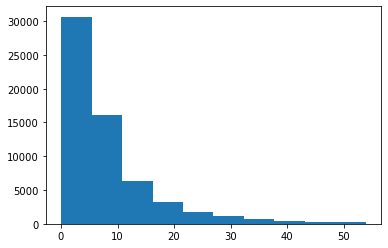

In [361]:
plt.hist(f_df['LOS_days']);

In [362]:
f_df['LOS_days'].describe()

count    61109.000000
mean         8.458117
std          8.253185
min          0.050000
25%          3.250694
50%          5.402778
75%         10.197917
max         53.870833
Name: LOS_days, dtype: float64

## Convert LOS_days to Categorical

In [363]:
# Calculate Tertiles

q1 = f_df['LOS_days'].quantile(q=(1/3))
q2 = f_df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

3.9493364197530854
8.041435185185177


In [364]:
# bin the LOS_days var

LOS = f_df['LOS_days']
m = max(LOS)

bins = [0, 3.9493364197530854, 8.041435185185177, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

f_df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [365]:
f_df['LOS_days'].value_counts()

0    20370
2    20370
1    20369
Name: LOS_days, dtype: int64